<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
FALL 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Neural Networks <br>
<font color=696880 size=4>
Arash Ziyaei Razban - Mahan Bayhaghi

____________

# Personal Data
Please fill in your details below to help us keep track of your submission.

Student Name: `Emadeddin Rostamian`

Student ID: `403206479`

# Recurrent Neural Network (RNN)

Nowadays machine learning algorithms and models are used to solve too many types of problems. One of the most important problems is sequence modeling. Sequence modeling is the ability of an algorithm to model, interpret, make predictions about, or generate sequence data like audio, text, etc.

One of the most used algorithms to solve sequence modeling problems is the Recurrent Neural Network which is a specialized form of the classical Artificial Neural Network (Multi-Layer Perceptron). Below is a picture of this network architecture:

<img src="/content/RNN.jpg" width="400" height="200">

In sequences there is a common feature, that each value has some dependency on its previous members. A simple example is arithmetic sequence: $a_i = i * d + a_0, 0 \leq i$, where $a_n$ is dependent on $a_{n-1}$. So based on this nature of the sequences, there is a loop inside the RNN cell. This helps the RNN cell to remember some information about the previous activation values.

In general, RNN is used to model sequences because of the following advantages:
+ handles variable-length dependencies.
+ Tracks dependencies.
+ Maintains information about the order.
+ Shares parameters across the sequence.


# What you are going to do in this notebook

+ `Step1.` You have to design a simple neural network that has only 4 neurons, inspired by the RNNs architecture, and use it to predict the next number of an arithmetic sequence.

+ `Step2.` You have to increase the number of the neurons to 8. Then you have create a complex dataset of arithmetic sequences, that in each with a number of `d` called $1 \leq n$.

+ `Step3.` In the previous sections, you will find out why just using the basic architecture of RNNs does not work for complex data. So, for this step, you have to implement a Gated Recurrent Unit (GRU) from scrach to train and test it over the MNIST dataset and compare it with PyTorch GRU.

# START TO LEARN ABOUT RNNs (30 points)
Step 1. First, we start with simple data, like arithmetic sequence: $a_i = i * d + a_0, 0 \leq i$.

You have to design a simple neural network (only 4 neurons) inspired from the RNNs to predict the next number in the sequence.

`Note`: First, try to solve this problem theoretically (find the final values for your network's weights) and then implement it.

`your answer:` $X = a_i, h_t = f(W_hh_{t-1} + W_xX_t + b_0), y = g(W_yh_t + b_y)$


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

In [31]:
# TODO
def CustomDataset(max_length = 20, size = 10000):
    """
        Generate your dataset with following details:
        -100 <= a_i <= 100
        -20 <= d <= 20
        len(sequence) <= max_length

        Parameters:
            - max_length = 20
            - size = 10000

        Returns:
            - dataset = [(length, sequence, next_number in the sequence) for each sequence]
    """
    np.random.seed(42)
    dataset = []
    for _ in range(size):
        # TODO
        a0 = np.random.randint(-100, 101)
        d = np.random.randint(-20, 21)
        length = np.random.randint(1, max_length + 1)
        sequence = [a0 + i * d for i in range(length)]
        next_number = a0 + length * d
        dataset.append((length, sequence, next_number))

    return dataset

# Now create the model:
Based on the this task design your model.
+ Note that, your model should inspire from the behavior of RNNs.
+ Solve this problem theoretically. Then you will find out you only need 4 neurons.

In [47]:
# TODO
class Model(nn.Module):
    """
        Design your model.
    """
    def __init__(self):
        super(Model, self).__init__()
        self.hidden_size = 2
        self.hidden_state = None
        self.input_to_hidden = nn.Linear(1, self.hidden_size)
        self.hidden_to_hidden = nn.Linear(self.hidden_size, self.hidden_size)
        self.hidden_to_output = nn.Linear(self.hidden_size, 1)
        self.h_t = torch.zeros(1, self.hidden_size)
    def forward(self, x):
        self.h_t = torch.nn.functional.relu(self.input_to_hidden(x) + self.hidden_to_hidden(self.h_t))
        output = self.hidden_to_output(self.h_t)
        return output

# Training Loop
Now you have to train your model.

Note, your architecture must be based on RNNs. This means that you have to set a hidden state called `h` and use it to create a loop for your model like RNNs.

In [48]:
# create your dataset, using the CustomeDataset function
dataset = CustomDataset()
# Initialize model, loss function (use MSE Loss function), and optimizer (use adam optimizer)
model = Model()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# TODO
# Training loop
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for length, x, y in dataset:
        optimizer.zero_grad()
        # set hidden state
        model.h_t = torch.zeros(1, model.hidden_size)
        # set x = sequences
        x = torch.tensor(x, dtype=torch.float32)
        x = x.view(-1, 1)
        # set y = next numbers
        y = torch.tensor(y, dtype=torch.float32)
        y = y.view(1, -1)
        # initialize your output
        output = None
        # create a loop: use hidden state
        for i in range(length):
          output = model(x[i])
        # get loss
        loss = criterion(output, y)
        # backward pass
        loss.backward()
        # optimizer step
        optimizer.step()
        # compute total loss
        total_loss += loss.item()

    # print total loss after each epoch
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(dataset):.4f}")

Epoch 1/10, Loss: 575.6015
Epoch 2/10, Loss: 31.1004
Epoch 3/10, Loss: 24.0707
Epoch 4/10, Loss: 23.9416
Epoch 5/10, Loss: 23.8572
Epoch 6/10, Loss: 23.8135
Epoch 7/10, Loss: 23.7454
Epoch 8/10, Loss: 23.7486
Epoch 9/10, Loss: 23.7494
Epoch 10/10, Loss: 23.7169


# Weights Evaluation
Print the weights of the model.

You can see, model's weight are exactly same as what you have found in theoretical way.

In [50]:
# TODO
# print model's weights
print("Model's Weights:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")


Model's Weights:
input_to_hidden.weight: tensor([[ 0.7605],
        [-1.0149]])
input_to_hidden.bias: tensor([1.8628, 3.7894])
hidden_to_hidden.weight: tensor([[0.1494, 0.7048],
        [1.2551, 0.1172]])
hidden_to_hidden.bias: tensor([1.6129, 2.5342])
hidden_to_output.weight: tensor([[ 1.2193, -0.9223]])
hidden_to_output.bias: tensor([0.9053])


# Write your opinion
How this model use hidden state? Why hidden state is helpful?

`your answer:` The hidden state acts as a memory that captures the sequential dependencies between the inputs over time. The hidden state is updated at each time step based on the current input and the previous hidden state, allowing the model to retain information about past inputs. This is particularly helpful in sequence prediction tasks where the model needs to remember previous values to accurately predict the next one. The hidden state allows the model to model temporal patterns, making it capable of handling sequences and capturing dependencies over time.

# Analysis of long-term dependencies (40 points)
Step 2. Now, we are going to do some analysis. In the previous, both the dataset and model were simple. Now, we want to make it a little complex.

+ Assume the lengths for all sequences are equal.
+ Consider each sequence has `n` number of `d`:
    - e.g, $a_0, a_0 + d_0, a_1 + d_1, a_2 + d_2, ...., a_{n-1} + d_{n-1}, a_{n} + d_0, a_{n+1} + d_1, ...$
+ Change your model: just increase the number of neurons to 8. Also, because your input's dimension has changed, you have to increase the hidden state `h` dimension.
+ Create a loop over all possible $2 \leq n \leq 10$ and generate a dataset for each one. Then train a new model for each dataset.
+ At the end, show a `TotalLoss - numberOfd` plot.

In [52]:
# new model
# TODO
class Model(nn.Module):
    """
        Design your model.
    """
    def __init__(self):
        super(Model, self).__init__()
        self.hidden_size = 8
        self.input_to_hidden = nn.Linear(1, self.hidden_size)
        self.hidden_to_hidden = nn.Linear(self.hidden_size, self.hidden_size)
        self.hidden_to_output = nn.Linear(self.hidden_size, 1)
        self.h_t = torch.zeros(1, self.hidden_size)

    def forward(self, x):
        self.h_t = torch.nn.functional.relu(self.input_to_hidden(x) + self.hidden_to_hidden(self.h_t))
        output = self.hidden_to_output(self.h_t)
        return output

In [53]:
# TODO
def CustomDataset(n, length = 20, size = 10000):
    """
        Generate your dataset with following details:
        -100 <= a_i <= 100
        -20 <= d <= 20

        Parameters:
            - n: number of d in sequences
            - length = 20 (length of all sequences)
            - size = 10000

        Returns:
            - dataset = [(length, sequence, next_number in the sequence) for each sequence]
    """
    dataset = []
    for _ in range(size):
        a_0 = np.random.randint(-100, 100)
        d = [np.random.randint(-20, 20) for _ in range(n)]
        sequence = [a_0]
        for i in range(1, length):
            step = d[i % n]
            sequence.append(sequence[-1] + step)

        next_number = sequence[-1] + d[0]
        dataset.append((length, sequence, next_number))

    return dataset

In [59]:
# TODO
losses = []
epochs = 10

for n in range(2, 10):
    print(f'd = {n}\n')
    total_loss = 0
    # create your dataset, using the CustomeDataset function
    dataset = CustomDataset(n=n)

    # Initialize model, loss function (user MSE Loss function), and optimizer (use adam optimizer)
    model = Model()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0

        for length, sequence, next_number in dataset:
            optimizer.zero_grad()

            sequence_tensor = torch.tensor(sequence, dtype=torch.float32).view(-1, 1)
            next_number_tensor = torch.tensor([[next_number]], dtype=torch.float32)

            model.h_t = torch.zeros(1, model.hidden_size)

            output = None
            for x in sequence_tensor:
                output = model(x)

            loss = criterion(output, next_number_tensor)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        total_loss += epoch_loss / len(dataset)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(dataset)}")
    losses.append(total_loss / epochs)

d = 2

Epoch [1/10], Loss: 476.3573745857203
Epoch [2/10], Loss: 8.624741488103068
Epoch [3/10], Loss: 5.832890249675133
Epoch [4/10], Loss: 4.18378172390386
Epoch [5/10], Loss: 3.35908796920014
Epoch [6/10], Loss: 4.204329414248458
Epoch [7/10], Loss: 2.505450108696392
Epoch [8/10], Loss: 2.239080124522925
Epoch [9/10], Loss: 2.0693180677202143
Epoch [10/10], Loss: 2.1348177198184812
d = 3

Epoch [1/10], Loss: 1046.1717888498695
Epoch [2/10], Loss: 3.8425800135429817
Epoch [3/10], Loss: 1.9567705494050984
Epoch [4/10], Loss: 1.533549107488796
Epoch [5/10], Loss: 4.96228466035746
Epoch [6/10], Loss: 1.061947283546523
Epoch [7/10], Loss: 1.1987646323025163
Epoch [8/10], Loss: 0.9805707555401543
Epoch [9/10], Loss: 0.925604679268655
Epoch [10/10], Loss: 1.2752399860027506
d = 4

Epoch [1/10], Loss: 478.9403853856806
Epoch [2/10], Loss: 20.865441084192803
Epoch [3/10], Loss: 7.485569084843323
Epoch [4/10], Loss: 5.779163346198153
Epoch [5/10], Loss: 4.1943302232562
Epoch [6/10], Loss: 3.1

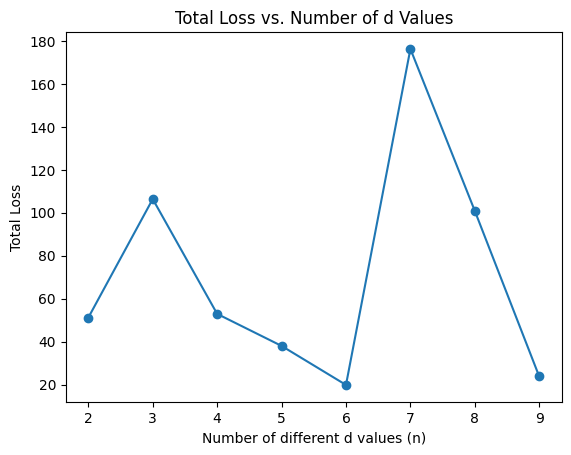

In [60]:
# plot your amount of loss and number of d in datasets
# TODO
plt.plot(range(2, 10), losses, marker='o')
plt.xlabel('Number of different d values (n)')
plt.ylabel('Total Loss')
plt.title('Total Loss vs. Number of d Values')
plt.show()

# Write your opinion

+ You can see, as the number of d in the sequences increases the amount of the total loss increases too. Why?
    - `your answer:` As the number of d in the sequences increases, the sequence becomes more complex because the model needs to learn and retain multiple dependencies simultaneously. This complexity makes it harder for the RNN to capture all the variations and relationships effectively, leading to a higher total loss. Additionally, longer dependencies between elements increase the likelihood of gradient issues during backpropagation.

+ Can you mathematically explain your opinion? (help: There are some gradient issues!)
    - `your answer:`In RNNs, the gradient of the loss with respect to earlier timesteps is computed by repeated application of the chain rule:  
$$\frac{\partial \mathcal{L}}{\partial \theta} = \sum_{t=1}^{T} \frac{\partial \mathcal{L}}{\partial h_t} \prod_{k=t}^{T} \frac{\partial h_k}{\partial h_{k-1}} \frac{\partial h_{k-1}}{\partial \theta}, $$


When $ T $ (the sequence length) increases:  
1. **Vanishing Gradient**: The term $ \prod_{k=t}^{T} \frac{\partial h_k}{\partial h_{k-1}} $ can become very small if the recurrent weight matrix has eigenvalues $ < 1 $. This leads to gradients approaching zero, preventing effective learning.  
2. **Exploding Gradient**: If the recurrent weight matrix has eigenvalues $ > 1 $, the product grows exponentially, causing gradients to explode, destabilizing the training process.

In sequences with multiple $ d $, the repeated updates intensify these gradient problems, particularly for longer-term dependencies.

+ Can you explain the problem of Long-term dependencies in RNNs?
    - `your answer:` RNNs struggle with long-term dependencies because they rely on a single hidden state to encode all past information, which becomes insufficient for longer sequences. Additionally, gradients can vanish or explode during backpropagation, making it hard to retain information from earlier timesteps. This results in a bias toward recent inputs, causing the model to forget or undervalue earlier parts of the sequence.

# Gated Recurrent Units (GRUs) (30 points)

Step3. In the previous section, you saw, simple recurrent models cannot remember information from the past. This is a big problem because in real-world applications sequences have a lot of dependencies on their past time steps and we have to find a way to remember the information from the past. To address this problem, researchers have designed other architecture that can selectively remember or forget information over time. Like: `Long-Short Term Memory (LSTM)` and `Gated Recurrent Unit (GRU)`. The key building block behind these architectures is `gate`.

#### GATE:
These networks, use gates to track information throughout many time steps:
+ Add information, when the information is needed.
+ Remover information, When information is not important

<img src="GATE.jpg" width="400" height="200">

#### Long-Short Term Memory:
LSTM is an improved version of RNNs. In a classical recurrent model, there is a single hidden state `h` which is used to help the model to remember some information over time. But this is not enough to learn long-term dependencies. Using gates, LSTM is capable of addressing the problem of long-term dependencies.

LSTM cell:

<img src="LSTM.jpg" width="400" height="200">

GATES:
+ <font color=green size=3> Forget gate:</font> To forget irrelevant information.
+ <font color=red size=3> Store gate:</font> Decide what part of new is relevant.
+ <font color=orange size=3> Update:</font> update cell state values.
+ <font color=blue size=3> Output gate:</font> Controls what information is sent to the next time step.

This architecture addresses the gradient issues you have described in the previous section. (How?)

`write your answer`

#### Gated Recurrent Unit (GRU):
Like LSTM, GRU is designed to model sequential data by allowing information to be selectively remembered or forgotten over time.

GRU cell:

<img src="GRU.jpg" width="400" height="200">

GATES and other parts:
+ <font color=green size=3> Reset gate:</font> How much of previous hidden state to forget.
    - $r_t = \sigma(W_r \cdot [h_{t-1}, x_t])$
+ <font color=orange size=3> Update gate:</font> How much of the candidate activation vector to incorporate into the new hidden state.
    - $z_t = \sigma(W_z \cdot [h_{t-1}, x_t])$
    
+ <font color=red size=3> Candidate Activation vector:</font> Computed using the current input x and modified version of the previous hidden state that is `reset` by the reset gate.
    - $\tilde{h}_t = \tanh(W_h \cdot [r_t \odot h_{t-1}, x_t])$

+ <font color=blue size=3> Hidden state</font>
    - $h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t$

Note: the $W_r$, $W_z$, $W_h$ are the weights associated with the GRU cell.

# GRU Implementation
Now, implement a Gated Recurrent Unit from scratch.

In [11]:
class GRU_cell(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_calsses):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_classes = num_calsses

        self.reset_gate = nn.Linear(self.input_dim + self.hidden_dim, self.hidden_dim)
        self.update_gate = nn.Linear(self.input_dim + self.hidden_dim, self.hidden_dim)
        self.candidate = nn.Linear(self.input_dim + self.hidden_dim, self.hidden_dim)

        self.output = nn.Linear(self.hidden_dim, self.num_classes)

        # TODO
        # define activation functions
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
    def forward(self, x, h, end = False):
        # TODO
        # (reset gate, update gate, candidate vector, hidden state, output)
        # feel free to change the input parameter
        combined = torch.cat((x, h), dim=1)
        r = self.sigmoid(self.reset_gate(combined))
        z = self.sigmoid(self.update_gate(combined))
        combined_reset = torch.cat((x, r * h), dim=1)
        h_candidate = self.tanh(self.candidate(combined_reset))
        h_next = (1 - z) * h + z * h_candidate
        if end:
            output = self.output(h_next)
            return h_next, output
        return h_next

# MNIST
MNIST database is a collection of handwritten digits. You are going to use this database to train and test your GRU cell.

First, to download this database run the cell below.

In [12]:
database = MNIST(root = 'data/', download = True)
# TODO
# get train and test data - use transforms.ToTensor() to convert images to tensor
transform = transforms.ToTensor()
train_data = MNIST(root='data/', train=True, download=True, transform=transform)
test_data = MNIST(root='data/', train=False, download=True, transform=transform)

print(f"Number of training samples: {len(train_data)}")
print(f"Number of testing samples: {len(test_data)}")

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.2MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.60MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.73MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Number of training samples: 60000
Number of testing samples: 10000


Show the image and label of one instance from the train data.

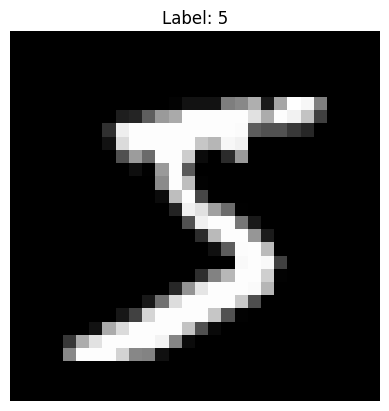

In [13]:
# TODO
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

In [14]:
# TODO
# show one image tensor
image.squeeze()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

### Write a generate custom dataset function
+ For each data in the database convert, use one-hot encoding from pytorch to encode your label to a vector. This is necessary for computing the amount of loss.
+ It is common to use batches of data to train our model simultaneously on a batch. The length of a batch at most is `BATCH_SIZE`.
    - Note: you can also train your model on each data (one by one) but the training part will take too much time.
+ Return batches of data.

In [15]:
HIDDEN_DIM = 15
INPUT_DIM = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 30

In [25]:
class CustomDataset(Dataset):
    def __init__(self, data, transform=None, batch_size=128):
        self.data = data
        self.transform = transform
        self.batch_size = batch_size

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get the image tensor and label
        image_tensor, label = self.data[idx]

        # Apply transformation only if it's needed (i.e., if it's not already a tensor)
        if self.transform is not None and not isinstance(image_tensor, torch.Tensor):
            image_tensor = self.transform(image_tensor)

        # One-hot encode the label
        encoded_label = F.one_hot(torch.tensor(label), num_classes=NUM_CLASSES).float()

        return image_tensor, encoded_label

def create_dataloader(batch_size=128):
    transform = transforms.Compose([transforms.ToTensor()])
    train_data = MNIST(root='data', download=True, train=True, transform=transform)
    train_dataset = CustomDataset(train_data, transform=transform, batch_size=batch_size)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

    return train_loader

### Training loop
write your training loop.
+ For loss function: use `CrossEntropyLoss` function
+ Use adam optimizer
+ To optimize your training process, you can use `optim.lr_schduler`. (Why this will improve the training process?)
    - `your answer:`
Using a learning rate scheduler like StepLR helps improve training by adjusting the learning rate over time. Initially, a higher learning rate allows the model to converge faster, while a lower learning rate later in the training prevents overshooting and allows for more precise weight adjustments. This combination speeds up the early stages of learning and stabilizes the process as the model approaches optimal performance.
+ Note: Also, in each time step give one row of image tensor to the model because your model is sequential (you also can use each column).

In [26]:
# TODO
from torch.optim import lr_scheduler
# Create batches
train_loader = create_dataloader(batch_size=BATCH_SIZE)
# Initialize model, loss function, and optimizer
model = GRU_cell(INPUT_DIM, HIDDEN_DIM, NUM_CLASSES)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Check if GPU is available and move model to GPU if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Use scheduler to set learning rate
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Training loop
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        x_batch = x_batch.squeeze(1).permute(0, 2, 1)

        h = torch.zeros(x_batch.size(0), HIDDEN_DIM, device=device)

        for t in range(x_batch.size(1)):
            x_t = x_batch[:, t, :]
            h = model(x_t, h)

        _, outputs = model(x_t, h, end=True)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    scheduler.step()

    print(f"Epoch {epoch + 1}/{EPOCHS}, Loss: {total_loss / len(train_loader):.4f}")

Epoch 1/30, Loss: 1.7799
Epoch 2/30, Loss: 0.8518
Epoch 3/30, Loss: 0.5356
Epoch 4/30, Loss: 0.4076
Epoch 5/30, Loss: 0.3417
Epoch 6/30, Loss: 0.3043
Epoch 7/30, Loss: 0.2774
Epoch 8/30, Loss: 0.2577
Epoch 9/30, Loss: 0.2424
Epoch 10/30, Loss: 0.2286
Epoch 11/30, Loss: 0.2144
Epoch 12/30, Loss: 0.2126
Epoch 13/30, Loss: 0.2113
Epoch 14/30, Loss: 0.2101
Epoch 15/30, Loss: 0.2089
Epoch 16/30, Loss: 0.2077
Epoch 17/30, Loss: 0.2065
Epoch 18/30, Loss: 0.2053
Epoch 19/30, Loss: 0.2044
Epoch 20/30, Loss: 0.2032
Epoch 21/30, Loss: 0.2015
Epoch 22/30, Loss: 0.2014
Epoch 23/30, Loss: 0.2013
Epoch 24/30, Loss: 0.2011
Epoch 25/30, Loss: 0.2011
Epoch 26/30, Loss: 0.2009
Epoch 27/30, Loss: 0.2008
Epoch 28/30, Loss: 0.2007
Epoch 29/30, Loss: 0.2006
Epoch 30/30, Loss: 0.2005


### Test your model on Test data
Use the test data to evaluate your model.
+ Print the accuracy of your model (should be greater than $94\%$).
+ Show some predictions with actual value from the test data.

In [32]:
model.eval()
correct = 0
total = 0
dataset = CustomDataset(test_data)

with torch.no_grad():
    for x, y in dataset:
        x, y = x.to(device), y.to(device)
        h = torch.zeros(1, HIDDEN_DIM).to(device)

        for t in range(x.shape[1]):
            input_row = x[:, t]
            h = model(input_row, h)

        output = model.output(h)
        _, predicted = torch.max(output.data, 1)

        total += y.size(0)
        correct += (predicted == y).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 22.35%


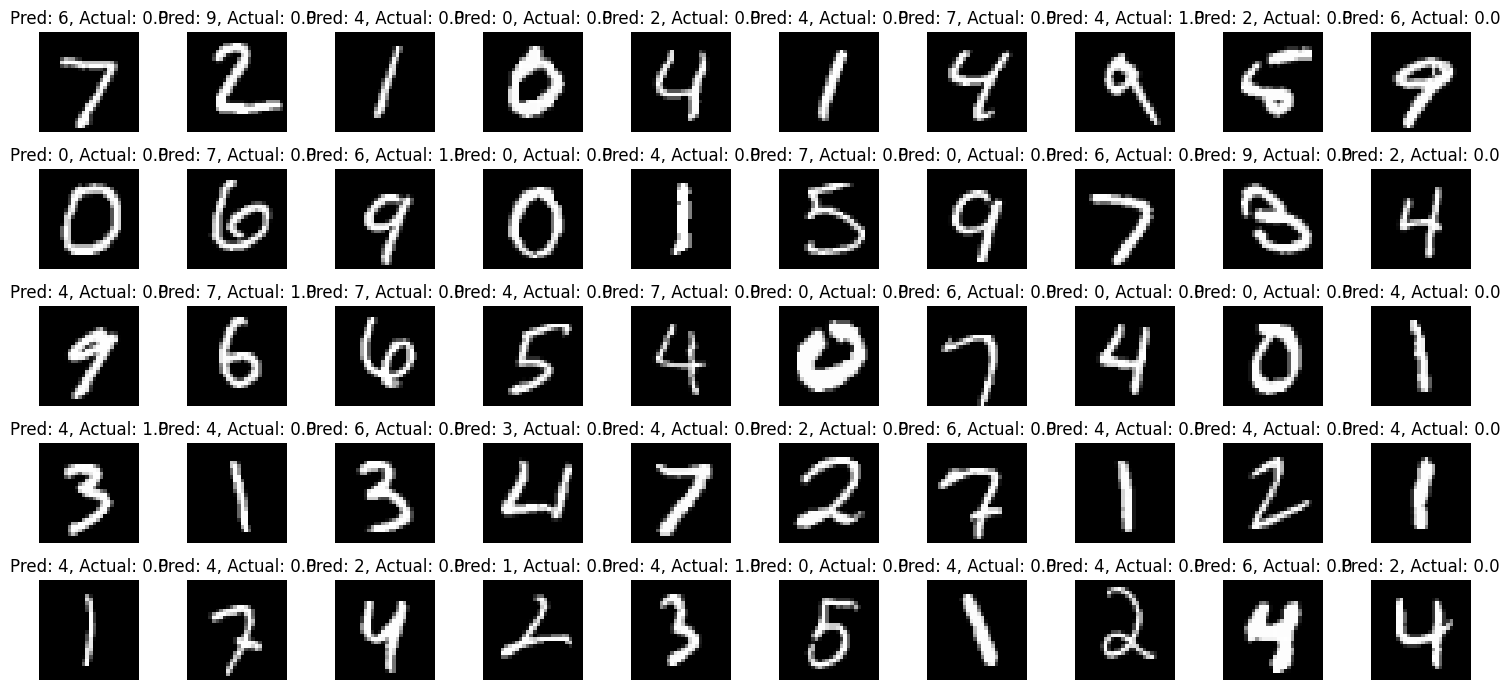

In [33]:
# show images of 50 predictions with actual values
import matplotlib.pyplot as plt

model.eval()
predictions = []
labels = []
images = []
dataset = CustomDataset(test_data)

with torch.no_grad():
    for x, y in dataset:
        x, y = x.to(device), y.to(device)
        h = torch.zeros(1, HIDDEN_DIM).to(device)

        for t in range(x.shape[1]):
            input_row = x[:, t]
            h = model(input_row, h)

        output = model.output(h)
        _, predicted = torch.max(output.data, 1)

        predictions.append(predicted.cpu())
        labels.append(y.cpu())
        images.append(x.cpu())

        if len(predictions) >= 50:
            break

# Flatten the lists
predictions = torch.cat(predictions)
labels = torch.cat(labels)
images = torch.cat(images)

# Plot the images and their corresponding actual and predicted values
fig, axes = plt.subplots(5, 10, figsize=(15, 7))
axes = axes.ravel()

for i in range(50):
    ax = axes[i]
    ax.imshow(images[i].view(28, 28), cmap="gray")
    ax.set_title(f"Pred: {predictions[i].item()}, Actual: {labels[i].item()}")
    ax.axis("off")

plt.tight_layout()
plt.show()